In [1]:
# Import Libraries
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read dataset
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


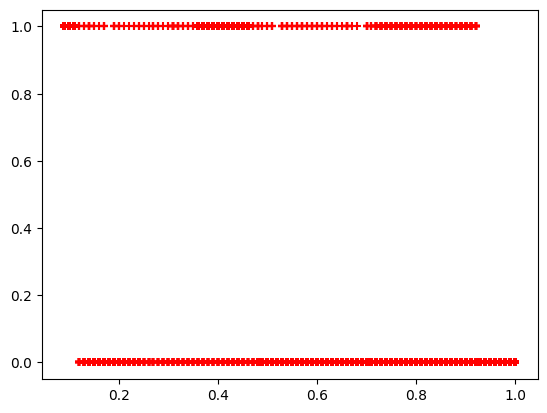

In [ ]:
# Plot in Satisfaction
plt.scatter(df.satisfaction_level,df.left,marker="+",color="red")

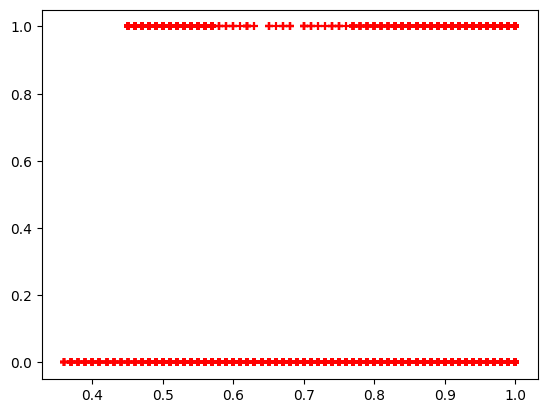

In [ ]:
# Plot in last evaluation
plt.scatter(df.last_evaluation,df.left,marker="+",color="red")

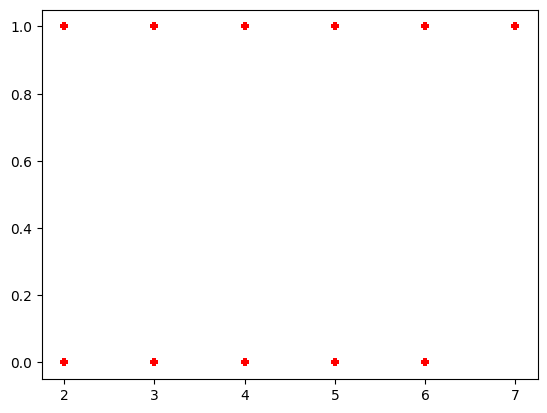

In [ ]:
# Plot in number of projects
plt.scatter(df.number_project,df.left,marker="+",color="red")

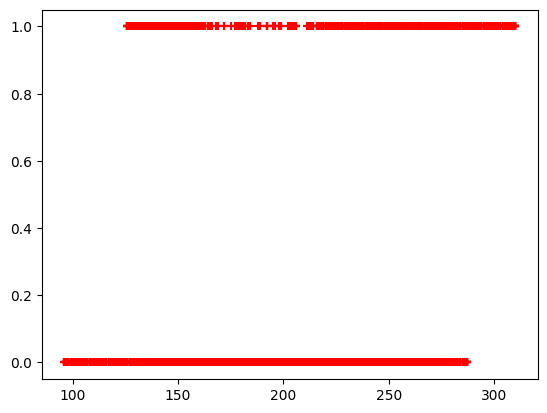

In [ ]:
# Plot in average montly hours
plt.scatter(df.average_montly_hours,df.left,marker="+",color="red")

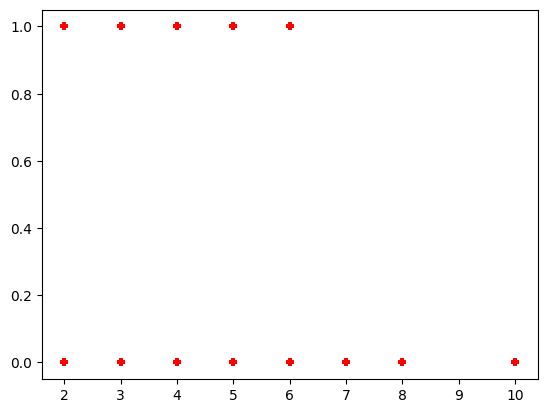

In [ ]:
# Plot with time_spend_company
plt.scatter(df.time_spend_company,df.left,marker="+",color="red")

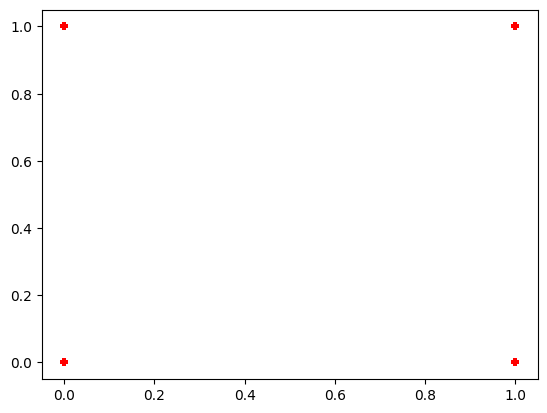

In [ ]:
# Plot with Work_accident
plt.scatter(df.Work_accident,df.left,marker="+",color="red")

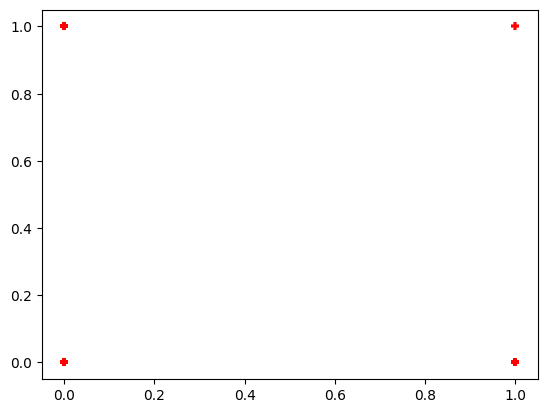

In [ ]:
# Plot for promotion_last_5year
plt.scatter(df.promotion_last_5years,df.left,marker="+",color="red")

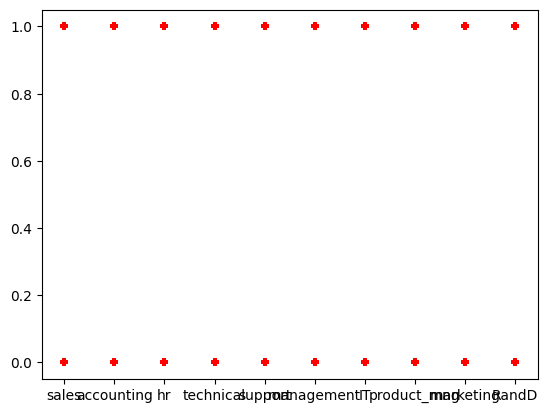

In [ ]:
# Plot for Department
plt.scatter(df.Department,df.left,marker="+",color="red")

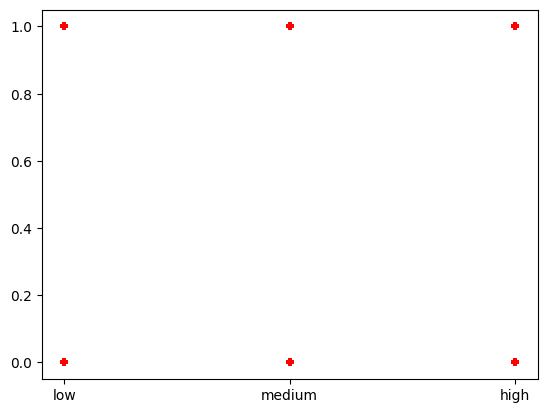

In [ ]:
# Plot with salary
plt.scatter(df.salary,df.left,marker="+",color="red")

In [ ]:
# The average number of:
# satisfaction_level: When the satisfaction is higher the employee do leave, when the satisfaction is lower the worker tend to leave
# last_evaluation: No important differene is observed
# number_project: No important difference is observed
# average_montly_hours: When people work more they tend to leave
# time_spend_company: When people stay longer in the company they leave
# Work_accident: No mayor difference
# promotion_last_5years: When people is promoted they tend to not leave

df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

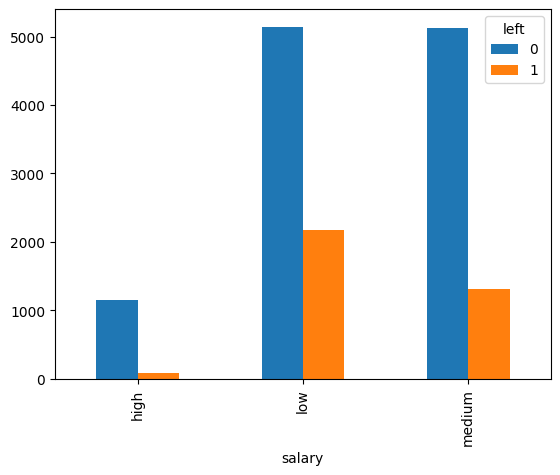

In [15]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

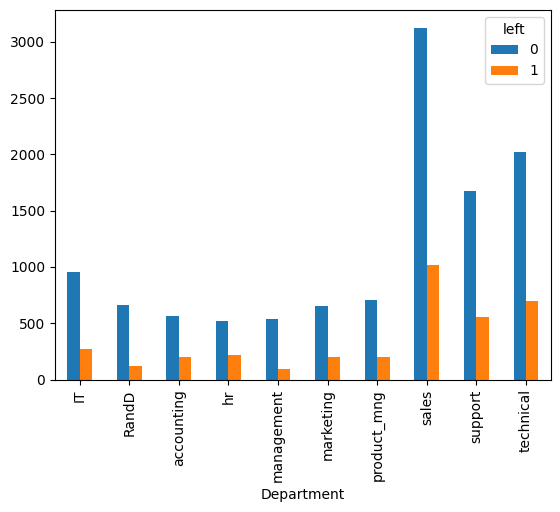

In [16]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [ ]:
# Filter dataset
filter_df = df[['satisfaction_level','average_montly_hours','time_spend_company','promotion_last_5years','salary']]
filter_df

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,157,3,0,low
1,0.80,262,6,0,medium
2,0.11,272,4,0,medium
3,0.72,223,5,0,low
4,0.37,159,3,0,low
...,...,...,...,...,...
14994,0.40,151,3,0,low
14995,0.37,160,3,0,low
14996,0.37,143,3,0,low
14997,0.11,280,4,0,low


In [ ]:
# Convert the dataste in a numerical representation
salary_dummies = pd.get_dummies(filter_df.salary, prefix="salary")
df_with_ohe = pd.concat([filter_df,salary_dummies],axis='columns')
df_with_ohe.drop('salary',axis='columns',inplace=True)

# Convert the columns to numerical values, when true it is 1 when false it is 0
df_with_ohe["salary_high"] = df_with_ohe["salary_high"].astype(int)
df_with_ohe["salary_low"] = df_with_ohe["salary_low"].astype(int)
df_with_ohe["salary_medium"] = df_with_ohe["salary_medium"].astype(int)
df_with_ohe.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,3,0,0,1,0
1,0.80,262,6,0,0,0,1
2,0.11,272,4,0,0,0,1
3,0.72,223,5,0,0,1,0
4,0.37,159,3,0,0,1,0


In [25]:
# The X variables are all columns but not leave column
X=df_with_ohe

# The y variable are the column to predict
y=df.left

In [29]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


In [30]:
# Create Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# Fit model
model.fit(X_train,y_train)

s:\Code\ML_Code\Logistic_Regression\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], shape=(4500,))

In [33]:
model.score(X_test,y_test)

0.7675555555555555

In [ ]:
# Lets train the model with less columns, in this case we exclude 'promotion_last_5years'
filter_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
filter_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [35]:
# Convert the dataste in a numerical representation
salary_dummies = pd.get_dummies(filter_df.salary, prefix="salary")
df_with_ohe = pd.concat([filter_df,salary_dummies],axis='columns')
df_with_ohe.drop('salary',axis='columns',inplace=True)

# Convert the columns to numerical values, when true it is 1 when false it is 0
df_with_ohe["salary_high"] = df_with_ohe["salary_high"].astype(int)
df_with_ohe["salary_low"] = df_with_ohe["salary_low"].astype(int)
df_with_ohe["salary_medium"] = df_with_ohe["salary_medium"].astype(int)
df_with_ohe.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [36]:
# The X variables are all columns but not leave column
X=df_with_ohe

# The y variable are the column to predict
y=df.left

In [ ]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


In [38]:
# Create Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [39]:
# Fit model
model.fit(X_train,y_train)

s:\Code\ML_Code\Logistic_Regression\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], shape=(4500,))

In [41]:
model.score(X_test,y_test)

0.768